<a href="https://colab.research.google.com/github/danilo-uea/RNA-2021.1-AA2.1/blob/main/RNA_AA_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais Artificiais - Atividade Avaliativa 2.1
> Criado por: Danilo Frazão, Rafael Aragão Morais & Yasser Tuma




In [81]:
!pip install numpy
!pip install matplotlib
!pip install prettytable
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from prettytable import PrettyTable

You should consider upgrading via the 'C:\Users\rapha\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\rapha\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\rapha\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


###Importando os dados

> O arquivo com os dados está armazenado em data no próprio repositório, como é um arquivo em binario, iremos utilizar a biblioteca numpy para extrair os dados.



In [82]:
def import_data(path):
  dt = np.dtype(float)
  arq = np.fromfile(path, dtype=dt)

  ret = np.empty((0, 3), float)

  for i in range(0, len(arq), 3):
    linha = np.array([[arq[i], arq[i+1], arq[i+2]]])
    ret = np.append(ret, linha, axis=0)

  return ret


In [83]:
path = "data/dataAll.txt"
data_All = import_data(path)


##Perceptron


> As funções abaixo compõem o treinamento, ajuste dos pesos, de um Perceptron



In [84]:
def activationFunction(u, teta):
  if(u >= teta):
    return 1
  else:
    return 0

In [85]:
def sumFunction(X, W):
  sum = 0
  for x,w in zip(X,W):
    sum += x*w
  return sum

In [86]:
def weightAdjustment(W, n, e, X):
  delta = np.dot((n*e), X)
  new_weight = np.add(W, delta);
  return new_weight

In [87]:
def epoch(inputData, W, n, teta):
  adjusts = 0;
  weights = []
  for idx, row in enumerate(inputData):
    sum = sumFunction(row[:-1], W)
    yp = activationFunction(sum, teta)
    if(row[-1] != yp):
      adjusts += 1;
      W = weightAdjustment(W, n, (row[-1] - yp), row[:-1])
      weights.append((idx, W))
  return (adjusts, weights, W)



In [88]:
def perceptronLearning(inputData, W, maxEpoch, n, teta):
  epochCount = 0
  adjustCount = 0
  adjust = True
  while(adjust):
    epochCount += 1
    (numAdjusts, oldWeights, W) = epoch(inputData, W, n, teta)

    print("\nNumero de epocas: " + str(epochCount))
    print("Numero de ajustes: " + str(numAdjusts))
    
    adjustCount += numAdjusts
    
    if(numAdjusts == 0):
      adjust = False #nao houve alteracoes nos valores dos pesos
      print("Os pesos foram ajustados")
    else:
      print("Pesos antigos e a linha em que foram alterados")
      for weight in oldWeights:
        print(weight[1], " - linha: ", weight[0])
      if(epochCount == maxEpoch):
        print("O limite maximo de epocas foi alcancado e nao foi possivel ajustar os pessos corretamente")
        break

  print("\nPesos finais: ", W)
  print("Numero total de epocas: " + str(epochCount))
  print("Numero total de ajustes: " + str(adjustCount))
  return (W, epochCount, adjustCount)


In [89]:
def addBias(inputData, bias):
  nd= np.insert(inputData, 2, bias, axis=1)
  return nd


## Parte I - Resolvendo um problema linearmente separavel



> Para esta parte, iremos utilizar o arquivo dataAll.txt;

> O neurônio perceptron terá as seguintes características:

*   Função de ativação degrau com limiar = 0,

*   Taxa de aprendizado = 0.1,

*   Os pesos das entradas inicialmente serão valores aleatórios no intervalo de -0.5 e 0.5 .








In [90]:
n_DataAll = 0.1 # taxa de aprendizado
teta_DataAll = 0 #degrau
w_DataAll = np.random.uniform(-0.5, 0.5, 3) #min, max, numero_de_valores
print("Vetor de pesos iniciais: ")
print(w_DataAll)
data_All = addBias(data_All, 1)
print("\n\nDados de entrada com o vies: \n [x1, x2, vies, y] \n")
data_All

Vetor de pesos iniciais: 
[-0.35584026 -0.1725617   0.05822127]


Dados de entrada com o vies: 
 [x1, x2, vies, y] 



array([[-363.7884,  244.1423,    1.    ,    0.    ],
       [ 328.7572, -256.7658,    1.    ,    1.    ],
       [-164.9827,  613.2164,    1.    ,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ,    1.    ],
       [ 822.6894, -702.6489,    1.    ,    1.    ],
       [-140.147 ,  734.0983,    1.    ,    0.    ]])

In [91]:
(finalWeights, num_epochs, num_adjusts) = perceptronLearning(data_All, w_DataAll, 0, n_DataAll, teta_DataAll)


Numero de epocas: 1
Numero de ajustes: 24
Pesos antigos e a linha em que foram alterados
[ 36.02299974 -24.5867917   -0.04177873]  - linha:  0
[ -17.63605026 -101.0825417    -0.14177873]  - linha:  3
[ 5.51599697e+01 -6.52529817e+01 -4.17787304e-02]  - linha:  7
[1.37758670e+02 1.46028483e+01 5.82212696e-02]  - linha:  18
[ 1.43604430e+02 -6.36917417e+01 -4.17787304e-02]  - linha:  26
[ 103.59551974 -141.5844317    -0.14177873]  - linha:  31
[157.26532974 -92.4921617   -0.24177873]  - linha:  43
[ 1.04305270e+02 -1.49361622e+02 -1.41778730e-01]  - linha:  45
[163.86478974 -99.2392917   -0.24177873]  - linha:  47
[ 1.18340160e+02 -1.64875222e+02 -1.41778730e-01]  - linha:  71
[209.05601974 -90.1619017   -0.24177873]  - linha:  107
[ 1.51275030e+02 -1.50470052e+02 -1.41778730e-01]  - linha:  110
[ 1.03008470e+02 -1.98939772e+02 -4.17787304e-02]  - linha:  604
[ 1.73455820e+02 -1.56823502e+02  5.82212696e-02]  - linha:  613
[ 1.26613820e+02 -2.08233372e+02  1.58221270e-01]  - linha:  633

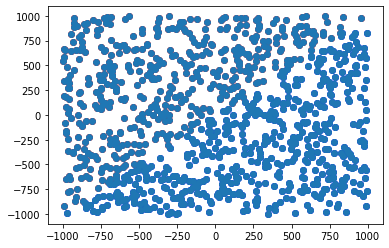

In [92]:
#grafico
def plotLine(inputData, W):
  h = []
  v = []
  for row in inputData:
    h.append(row[0])
    v.append(row[1])
    if(row[-1] == 0):
     plt.scatter(row[0], row[1], color='red')
    else:
      plt.scatter(row[0], row[1], color='blue')
  plt.plot(h , v, 'o')

plotLine(data_All, finalWeights)

In [93]:
#plt.plot(, y, 'o', color='black');
data_All[0]

array([-363.7884,  244.1423,    1.    ,    0.    ])

# Parte 2 - Experimentacao

> Para esta parte, iremos utilizar o arquivo data0.txt;

> O neurônio perceptron terá as seguintes características:

*   Função de ativação degrau com limiar = 0,

*   Taxa de aprendizado = {0.4, 0.1, 0.01},

*   Os pesos das entradas inicialmente serão valores aleatórios no intervalo de {(-100,100) (-0.5 e 0.5)} ,

*   Para cada combinação entre os possiveis valores da taxa de aprendizado e do intervalo inicial dos pesos, será realizada 10 interações.










In [94]:
path2 = "data/data0.txt"
data0 = import_data(path2)
data0

array([[-0.00149369, -0.03581784,  0.        ],
       [ 0.01234945,  0.10249524,  0.        ],
       [ 0.13954598,  0.05607083,  0.        ],
       ...,
       [ 0.95751872,  1.0035204 ,  1.        ],
       [ 0.97981588,  1.00949493,  1.        ],
       [ 1.02021556,  0.86533059,  1.        ]])

In [95]:
def perceptronLearningPart2(inputData, W, maxEpoch, n, teta):
  epochCount = 0
  adjustCount = 0
  adjust = True
  while(adjust):
    epochCount += 1
    (numAdjusts, oldWeights, W) = epoch(inputData, W, n, teta)
    
    adjustCount += numAdjusts
    
    if(numAdjusts == 0):
      adjust = False #nao houve alteracoes nos valores dos pesos
    else:
        if(epochCount == maxEpoch):
          break
  return (W, epochCount, adjustCount)


In [96]:
def iteration(inputData, w_index, n, teta):
  minEpochs = 0
  adjusts = []
  inputData = addBias(inputData, 1)

  for i in range(10):
    if(w_index == 0):
      W = np.random.uniform(-100, 100, 3)
    else:
      W = np.random.uniform(-0.5, 0.5, 3)
    
    (finalWeights, num_epochs, num_adjusts) = perceptronLearningPart2(inputData, W, 0, n, teta)

    if(minEpochs > num_epochs or not adjusts):
      minEpochs = num_epochs

    adjusts.append(num_adjusts)

  return ((sum(adjusts) / 10), np.std(adjusts), minEpochs)


In [97]:
PT = PrettyTable()

first_row = iteration(data0, 0, 0.4, 0)
second_row = iteration(data0, 1, 0.4, 0)
third_row = iteration(data0, 0, 0.1, 0)
fourth_row = iteration(data0, 1, 0.1, 0)
fifth_row = iteration(data0, 0, 0.01, 0)
sixth_row = iteration(data0, 1, 0.01, 0)

PT.field_names = ["Taxa de aprendizado", "Intervalo de pesos", "Media do numero de ajustes", "Desvio padrao do numero de ajustes", "Menor numero de epocas"]
PT.add_row(["n=0.4", "{-0.5, 0.5}", first_row[0], first_row[1], first_row[2]])
PT.add_row(["n=0.4", "{-100, 100}", second_row[0], second_row[1], second_row[2]])
PT.add_row(["n=0.1", "{-0.5, 0.5}", third_row[0], third_row[1], third_row[2]])
PT.add_row(["n=0.1", "{-100, 100}", fourth_row[0], fourth_row[1], fourth_row[2]])
PT.add_row(["n=0.01", "{-0.5, 0.5}", fifth_row[0], fifth_row[1], fifth_row[2]])
PT.add_row(["n=0.01", "{-100, 100}", sixth_row[0], sixth_row[1], sixth_row[2]])

print(PT)

+---------------------+--------------------+----------------------------+------------------------------------+------------------------+
| Taxa de aprendizado | Intervalo de pesos | Media do numero de ajustes | Desvio padrao do numero de ajustes | Menor numero de epocas |
+---------------------+--------------------+----------------------------+------------------------------------+------------------------+
|        n=0.4        |    {-0.5, 0.5}     |           237.3            |         120.57615850573445         |           6            |
|        n=0.4        |    {-100, 100}     |            7.8             |         2.5219040425836985         |           2            |
|        n=0.1        |    {-0.5, 0.5}     |           1070.2           |         505.7949782273446          |           11           |
|        n=0.1        |    {-100, 100}     |            12.3            |         6.277738446287803          |           2            |
|        n=0.01       |    {-0.5, 0.5}     |    

# Comentar sobre a tabela

# Parte 3 - Validação Houlout em Problema Não-Linearmente Separável

> Para esta parte, iremos utilizar o arquivo dataHoldout.txt;

> O neurônio perceptron terá as seguintes características:











In [98]:
n = 0.1 #Taxa de aprendizado
teta = 0 #Degrau usado na função de ativação
w = np.random.uniform(-0.5, 0.5, (1, 3)) #Vetor de pesos inicial
print("Vetor inicial de pesos: {}\n".format(w[0]))
 
def funcao(u): #Função de ativação
  if(u >= teta):
    return 1
  else:
    return 0
 
i = 0
ult_indice = len(data_All) - 1
encerrar = True
qtd_epocas = 0
total_ajustes = 0
 
while i <= ult_indice:
  
  if (i == 0): #Verifica a quantidade de épocas
    qtd_epocas += 1
    print('Época: {}'.format(qtd_epocas))
  
  linha = data_All[i]
  yd = linha[2]
  x = np.array([-1, linha[0], linha[1]])
 
  u = 0
  for j in range(3):
    u += (x[j] * w[-1][j])
 
  y = funcao(u) #Chama a função de ativação
  e = yd - y #Erro
 
  if (e != 0): #Há necessidade de aprendizagem
    print('Ajuste do peso: {} -> Exemplo: {}'.format(w[-1], i + 1))
    peso_novo = np.array([w[-1] + ((n * e) * x)]) #Delta
    w = np.append(w, peso_novo, axis=0) #Começa a próxima época
    encerrar = False
    total_ajustes += 1
 
  if (ult_indice == i): #Última linha
    print('Número de ajustes: {}'.format(total_ajustes))
    print('Vetor de pesos: ', w[-1])
    print('\n')
    if (encerrar == False):
      total_ajustes = 0
      encerrar = True
      i = -1 #Vai para o começo do array de dados
 
  i += 1
 
print('Total de ajustes: ', len(w) - 1)
print('Total de épocas: ', qtd_epocas)

Vetor inicial de pesos: [-0.10498682 -0.2575618  -0.03048028]

Época: 1
Ajuste do peso: [-0.10498682 -0.2575618  -0.03048028] -> Exemplo: 2
Ajuste do peso: [ -0.20498682  32.6181582  -25.70706028] -> Exemplo: 3
Ajuste do peso: [-0.30498682 16.1198882  35.61457972] -> Exemplo: 6
Ajuste do peso: [-0.40498682  7.3559382   4.91674972] -> Exemplo: 7
Ajuste do peso: [ -0.50498682  -9.8502818  -45.13412028] -> Exemplo: 8
Ajuste do peso: [-0.60498682 62.9457382  -9.30456028] -> Exemplo: 12
Ajuste do peso: [ -0.70498682 -29.6459718   83.15602972] -> Exemplo: 15
Ajuste do peso: [ -0.80498682 -34.5702418   66.06774972] -> Exemplo: 20
Ajuste do peso: [-0.90498682 14.9986982  31.45150972] -> Exemplo: 21
Ajuste do peso: [ -1.00498682  67.5872282  -67.21755028] -> Exemplo: 22
Ajuste do peso: [  -1.10498682  -29.1474718  -103.91293028] -> Exemplo: 24
Ajuste do peso: [  -1.20498682 -128.5811418   -45.83374028] -> Exemplo: 27
Ajuste do peso: [  -1.30498682 -134.4269018    32.46084972] -> Exemplo: 28
Aju